In [18]:
!pip install pandas matplotlib seaborn nltk wordcloud textblob

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import string
from collections import Counter

In [20]:
amazon_reviews = pd.read_csv('/content/amazon_reviews.csv')

In [21]:
amazon_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0


# **Treating the reviewText Column**

### Converting texts into lower case

Let's begin with standardizing the texts in the reviewText column by converting all the characters into the lower case. This helps the data look uniform.

In [22]:
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].str.lower()
amazon_reviews['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


### Treating Punctuations

In [23]:
amazon_reviews['reviewText'] = df['reviewText'].str.translate(str.maketrans('', '', string.punctuation))

In [24]:
amazon_reviews['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


### Removing numbers from the comments

In [25]:
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].str.replace(r'\d+', '', regex=True)

In [26]:
amazon_reviews['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


### Removing Stopwords

Why? - becuase stop words are like "doesn't, don't, hasn't" etc which is better to be removed as it reduces the noise and increases the focus of the algorithm on other important words like "terrible", "bad", "excellent", etc.

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
#English stopwords set
stop_words = set(stopwords.words('english'))

In [31]:
# Removing stopwords
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))

In [32]:
amazon_reviews['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected sprung higher capacity think ma...
3,think worked greathad diff bran gb card went s...
4,bought retail packaging arrived legit orange e...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


### Removing Rare Words

WHY? We remove rare words (i.e. words that appear only once or very few times across all reviews) because this helps clean up noise and reduce dimensionality, especially useful in modeling and visualization.

- First we will count the frequence of all the words and then will remove those who are used only once.

In [45]:
#flattening all words in the corpus and count them
word_freq = Counter(" ".join(amazon_reviews['reviewText']).split())

In [46]:
#checking rare words (e.g., words that appear only once)
rare_words = set([word for word, freq in word_freq.items() if freq == 1])

In [47]:
#now i will remove rare words from each review
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in rare_words])
)


### Tokenization

creating TextBlob objects and tokenizing reviews into words is a great next step for further NLP tasks like lemmatization

In [52]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [53]:
#Creating a new column with TextBlob objects
amazon_reviews['blob'] = amazon_reviews['reviewText'].apply(lambda x: TextBlob(x))

#Tokenizing the reviews into words
amazon_reviews['tokens'] = amazon_reviews['blob'].apply(lambda x: x.words)
amazon_reviews[['reviewText', 'tokens']].head()


,reviewText,tokens
0,issues,[issues]
1,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,..."
2,works expected higher capacity think made bit ...,"[works, expected, higher, capacity, think, mad..."
3,think worked gb card went south one held prett...,"[think, worked, gb, card, went, south, one, he..."
4,bought retail packaging arrived legit envelope...,"[bought, retail, packaging, arrived, legit, en..."


In [55]:
#Lemmatizing each word using TextBlob
amazon_reviews['lemmatized'] = amazon_reviews['blob'].apply(
    lambda x: ' '.join([word.lemmatize() for word in x.words])
)


amazon_reviews[['reviewText', 'lemmatized']].head()


,reviewText,lemmatized
0,issues,issue
1,purchased device worked advertised never much ...,purchased device worked advertised never much ...
2,works expected higher capacity think made bit ...,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...,bought retail packaging arrived legit envelope...


# **Visualization**

### FIrst we will check the frequency of words from Lemmitized comments

In [56]:
#Combine all lemmatized reviews into one string
all_words = ' '.join(amazon_reviews['lemmatized']).split()

#word frequencies
word_freq = Counter(all_words)

#making intto DataFrame
tf_df = pd.DataFrame(word_freq.items(), columns=['word', 'tf'])

#Sorting by term frequency
tf_df = tf_df.sort_values(by='tf', ascending=False).reset_index(drop=True)

tf_df.head(10)

,word,tf
0,card,5537
1,work,2044
2,phone,1909
3,gb,1756
4,great,1445
5,memory,1378
6,sandisk,1286
7,sd,1209
8,one,1120
9,use,1115


### Bar Plot

<ipython-input-57-1ef37f2b5175>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tf, x='tf', y='word', palette='viridis')


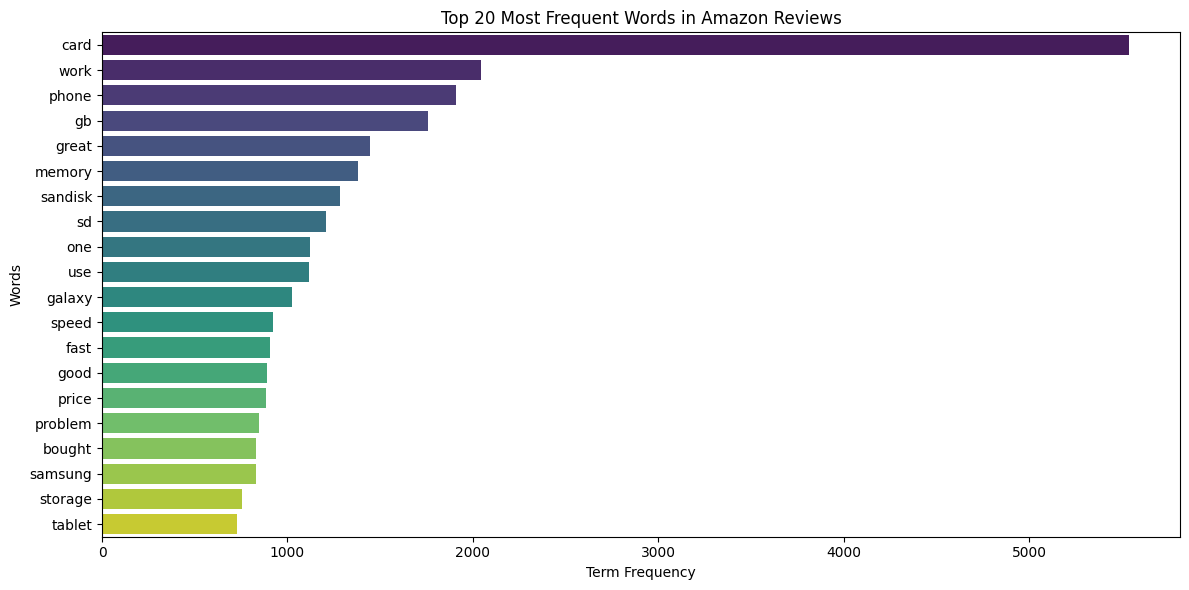

In [57]:
#number of top terms to visualize is 20
top_n = 20
top_tf = tf_df.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tf, x='tf', y='word', palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words in Amazon Reviews")
plt.xlabel("Term Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


### Wordcloud

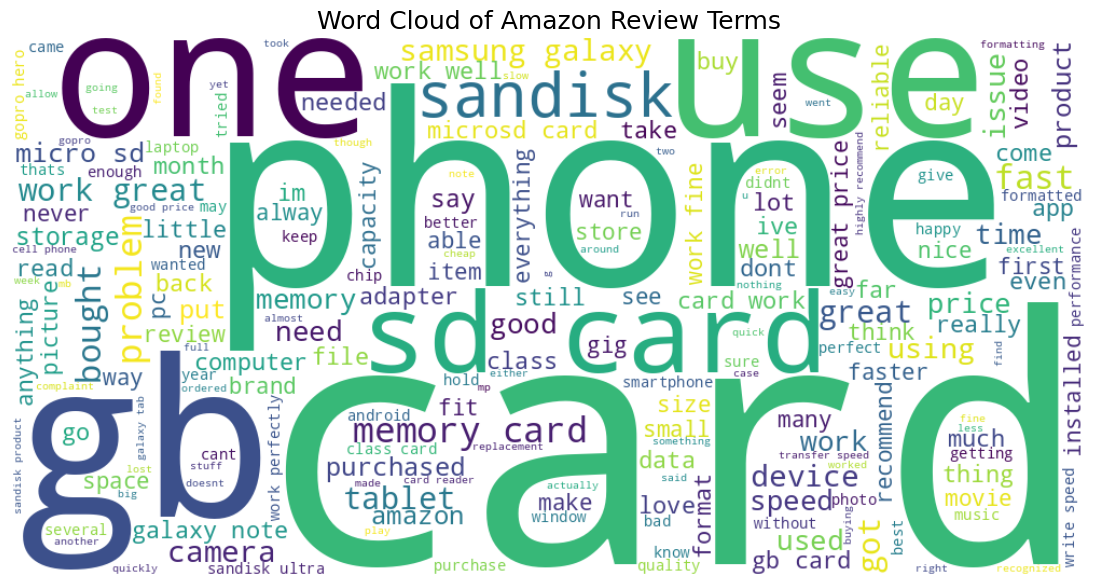

In [58]:
#here i will combine all lemmatized text into one string
text = ' '.join(amazon_reviews['lemmatized'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Amazon Review Terms", fontsize=18)
plt.show()


## **Top Insights**

**Dominant Words:**

- "phone", "card", "gb", "use", and "one" appear the most.

- These likely indicate that the product is a memory card or storage device for phones, given how commonly "gb", "phone", and "card" are mentioned together.

**Brand Mentions:**

- Words like "sandisk", "samsung", and "amazon" appear, highlighting popular brands referenced by customers.

**Use Cases:**

- Frequent use of "camera", "tablet", "computer", and "file" suggests people are using these products across different digital devices.

- Terms like "picture", "movie", "music", and "storage" reveal how customers are leveraging the product.

**Customer Sentiment Cues:**

- Positive descriptors like "great", "good", "fast", "reliable", and "perfectly" indicate overall satisfaction.

- Occasional mentions of "problem", "issue", and "complaint" suggest some negative experiences, but they are smaller and less frequent.

## **What This Tells Us**

- The reviews are likely about microSD cards or phone storage solutions.

- Customers focus on capacity (e.g., "gb"), device compatibility, and performance (e.g., "speed", "work").

- Most reviews reflect positive user experiences with brand-specific mentions (especially SanDisk and Samsung).



# Sentiment Analysis

In [59]:
# i will check polarity score for each review
amazon_reviews['polarity'] = amazon_reviews['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

#now assigning sentiment category based on polarity
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

amazon_reviews['sentiment'] = amazon_reviews['polarity'].apply(get_sentiment)

amazon_reviews[['lemmatized', 'polarity', 'sentiment']].head()


,lemmatized,polarity,sentiment
0,issue,0.000000,Neutral
1,purchased device worked advertised never much ...,-0.100000,Negative
2,work expected higher capacity think made bit e...,0.129167,Positive
3,think worked gb card went south one held prett...,0.250000,Positive
4,bought retail packaging arrived legit envelope...,0.483333,Positive


### Sentiments distribution on a bar plot

<ipython-input-60-8915305a52f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=amazon_reviews, x='sentiment', palette='pastel', order=['Positive', 'Neutral', 'Negative'])


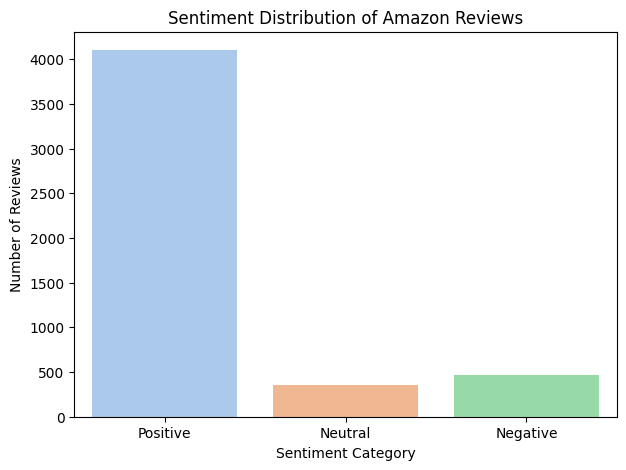

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(data=amazon_reviews, x='sentiment', palette='pastel', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of Amazon Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

### now I am comparing sentiment vs. overall star ratings that helps validate whether text sentiment aligns with numeric ratings (e.g., 1–5 stars).

In [61]:
# Ensure 'overall' is numeric
amazon_reviews['overall'] = pd.to_numeric(amazon_reviews['overall'], errors='coerce')

# Cross-tab: how sentiment is distributed across star ratings
sentiment_rating_ct = pd.crosstab(amazon_reviews['overall'], amazon_reviews['sentiment'])
sentiment_rating_ct


sentiment,Negative,Neutral,Positive
overall,,,
1.0,86,15,143
2.0,22,6,52
3.0,36,5,101
4.0,53,42,432
5.0,265,282,3375


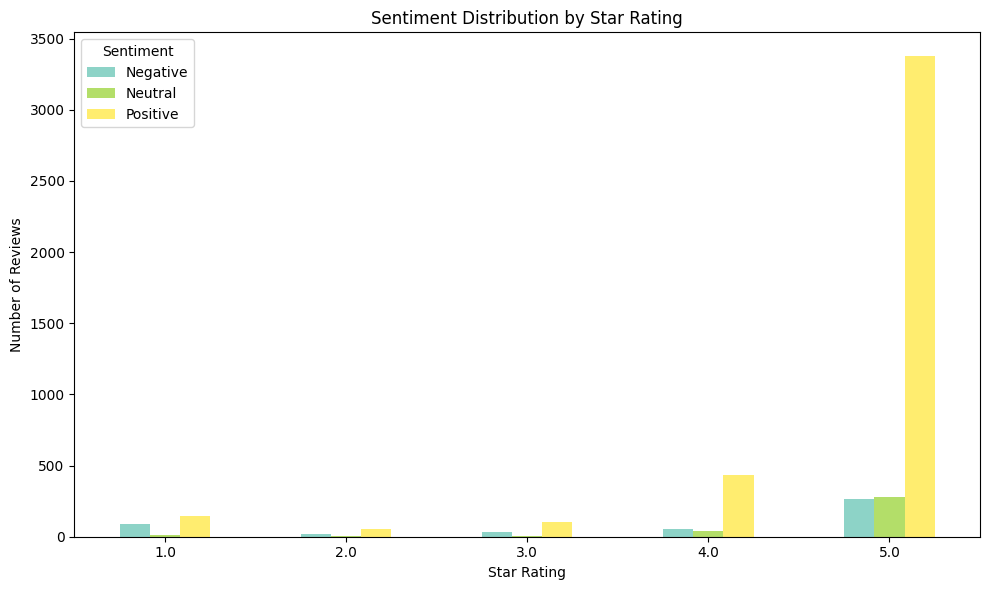

In [62]:
# Plotting sentiment counts per star rating
sentiment_rating_ct.plot(kind='bar', figsize=(10,6), colormap='Set3')
plt.title('Sentiment Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


# Machine Learning Modelling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Preparing Features

In [64]:
#my Features and target
X = amazon_reviews['lemmatized']
y = amazon_reviews['sentiment']

#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### TF-IDF Vectorization

In [65]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Training Logistic Regression Model

In [69]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Evaluate Model Performance

In [70]:
#Predictions
y_pred = model.predict(X_test_tfidf)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8158697863682605

Classification Report:
               precision    recall  f1-score   support

    Negative       0.42      0.70      0.52        92
     Neutral       0.39      0.64      0.49        70
    Positive       0.97      0.84      0.90       821

    accuracy                           0.82       983
   macro avg       0.59      0.73      0.64       983
weighted avg       0.88      0.82      0.84       983


Confusion Matrix:
 [[ 64  13  15]
 [ 17  45   8]
 [ 72  56 693]]


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, class_weight='balanced')

# Train
rf_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8524923702950152

Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.25      0.35        92
     Neutral       0.46      0.80      0.59        70
    Positive       0.92      0.92      0.92       821

    accuracy                           0.85       983
   macro avg       0.66      0.66      0.62       983
weighted avg       0.86      0.85      0.85       983


Confusion Matrix:
 [[ 23  18  51]
 [  0  56  14]
 [ 15  47 759]]


As we can see that both of our models have a good overall accuracy.
However, what I think is that both models are still underperforming when it comes to representing the minority class (the Negatives). Therefore I will now use the SMOTE method to see if I can improve on this part.

### SMOTE (Synthetic Minority Over-sampling Technique)

In [72]:
!pip install imbalanced-learn

In [74]:
from imblearn.over_sampling import SMOTE

#applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

#seeing new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({'Positive': 3282, 'Negative': 370, 'Neutral': 280})
After SMOTE: Counter({'Positive': 3282, 'Neutral': 3282, 'Negative': 3282})


### Training Logistic Regression on the balanced data

In [75]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000)

In [76]:
#Evaluating this now
y_pred_smote = model_smote.predict(X_test_tfidf)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy: 0.8453713123092573

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.65      0.56        92
     Neutral       0.43      0.66      0.52        70
    Positive       0.96      0.88      0.92       821

    accuracy                           0.85       983
   macro avg       0.63      0.73      0.67       983
weighted avg       0.88      0.85      0.86       983


Confusion Matrix:
 [[ 60  13  19]
 [ 12  46  12]
 [ 49  47 725]]


# Model Comparison Summary

Below is a comparison of the three models i applied for sentiment classification using TF-IDF vectors on Amazon reviews.

#### **1. Logistic Regression with class_weight='balanced'**
I used this model to address class imbalance without changing the dataset by adjusting weights during training.

- Accuracy: 81.6%
- Negative recall: 0.70
- Neutral recall: 0.64
- Positive recall: 0.84
- Macro F1-score: 0.64

This model performed best for the negative class but slightly struggled on neutral reviews. It is simple, efficient, and easy to interpret.

#### **2. Random Forest with class_weight='balanced'**
I used this ensemble model to capture more complex patterns and interactions.

- Accuracy: 85.2%
- Negative recall: 0.25
- Neutral recall: 0.80
- Positive recall: 0.92
- Macro F1-score: 0.66

While it achieved the highest overall accuracy, it underperformed on detecting negative reviews and may be prone to overfitting with sparse data.

#### **3. Logistic Regression with SMOTE oversampling**
I used this to synthetically balance the dataset by oversampling minority classes.

- Accuracy: 84.5%
- Negative recall: 0.65
- Neutral recall: 0.66
- Positive recall: 0.88
- Macro F1-score: 0.67

This model provided the most balanced performance across all sentiment classes, making it the most reliable for fair sentiment prediction.

